In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("worldometer_data.csv")
df

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


In [2]:
missing_values = df.isnull().sum()

print("Columns with Missing Values:")
print(missing_values[missing_values > 0])

Columns with Missing Values:
Continent             1
Population            1
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64


In [4]:
numeric_columns = ['Population', 'TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases',
                   'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop']

numeric_data = df[numeric_columns]

basic_stats = numeric_data.describe()

print(basic_stats)

         Population    TotalCases    TotalDeaths  TotalRecovered  \
count  1.110000e+02  1.110000e+02     111.000000    1.110000e+02   
mean   4.336426e+07  1.580725e+05    5492.684685    1.035874e+05   
std    1.384256e+08  5.845349e+05   19335.516281    3.427662e+05   
min    3.872900e+04  5.300000e+01       2.000000    3.100000e+01   
25%    3.753970e+06  3.186000e+03      53.500000    2.055500e+03   
50%    1.021314e+07  1.989000e+04     365.000000    1.094100e+04   
75%    3.590964e+07  7.667200e+04    1796.500000    4.409100e+04   
max    1.381345e+09  5.032179e+06  162804.000000    2.576668e+06   

        ActiveCases  Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  \
count  1.110000e+02        111.000000         111.00000     111.000000   
mean   4.899244e+04        579.801802        4262.90991     113.802703   
std    2.354763e+05       2141.379139        6178.80774     162.702584   
min    9.000000e+00          1.000000          45.00000       0.500000   
25%    6.645000e+

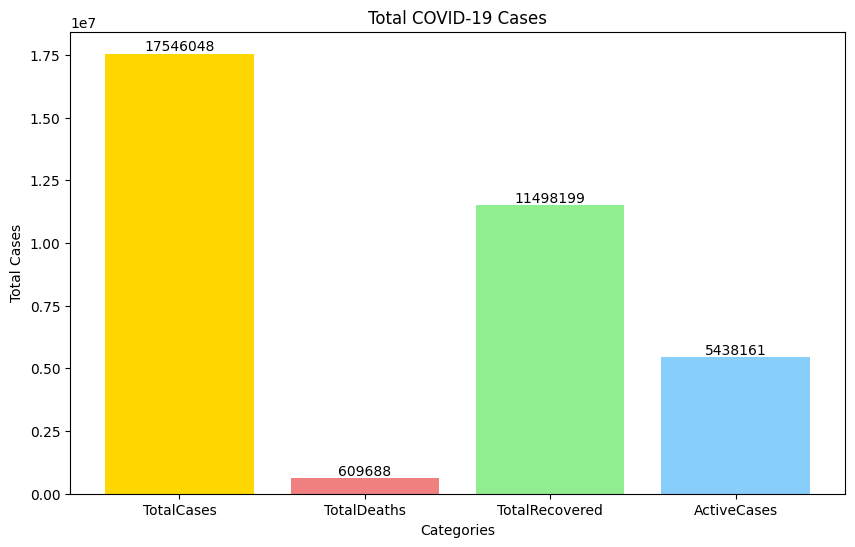

In [6]:
total_confirmed = df['TotalCases'].sum()
total_deaths = df['TotalDeaths'].sum()
total_recovered = df['TotalRecovered'].sum()
total_active = df['ActiveCases'].sum()

categories = ['TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases']
values = [total_confirmed, total_deaths, total_recovered, total_active]

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color=['gold', 'lightcoral', 'lightgreen', 'lightskyblue'])
plt.xlabel('Categories')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.show()

<ipython-input-8-493104742b61>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


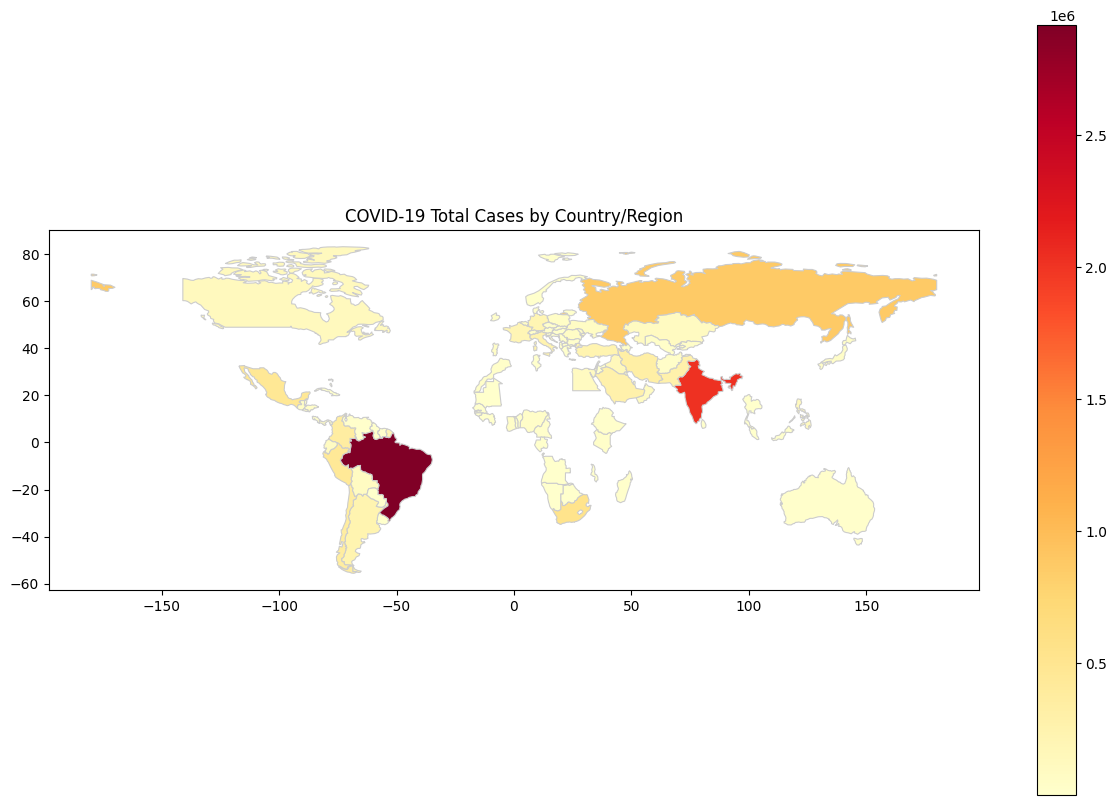

In [8]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged = world.merge(df, how='left', left_on='name', right_on='Country/Region')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='TotalCases', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('COVID-19 Total Cases by Country/Region')
plt.show()

<ipython-input-9-ddb4a7814e7e>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


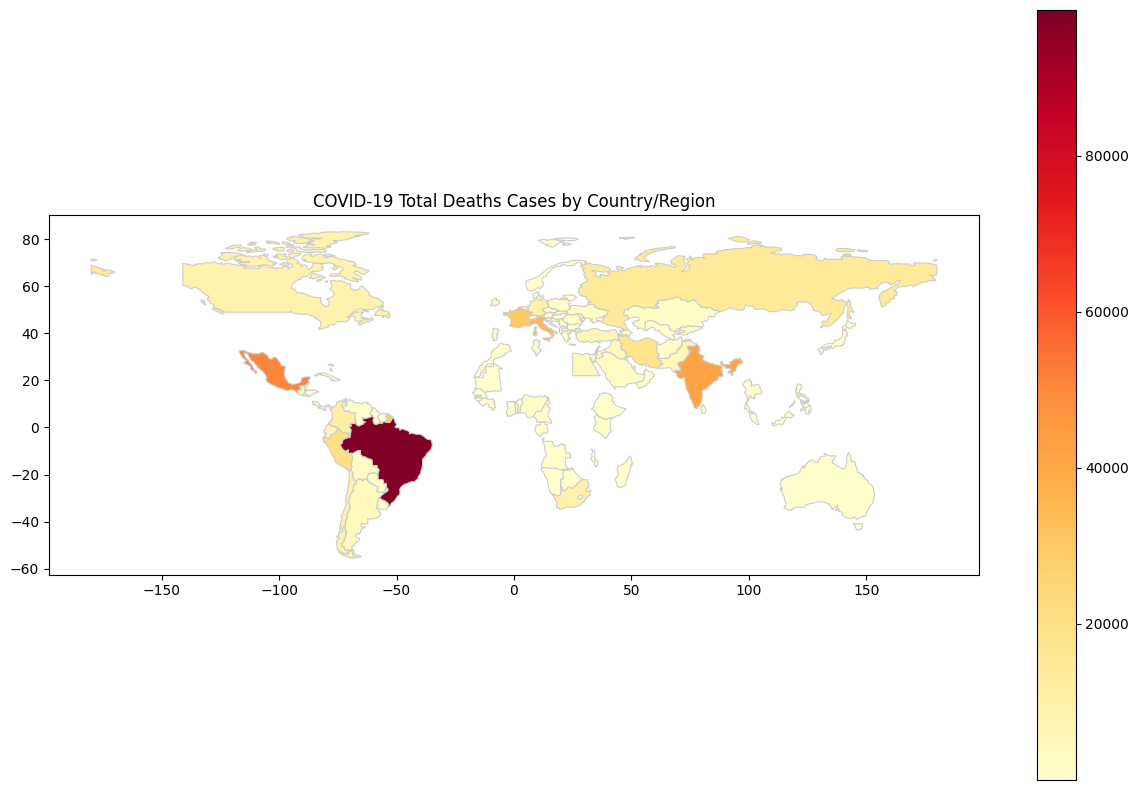

In [9]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged = world.merge(df, how='left', left_on='name', right_on='Country/Region')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='TotalDeaths', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('COVID-19 Total Deaths Cases by Country/Region')
plt.show()

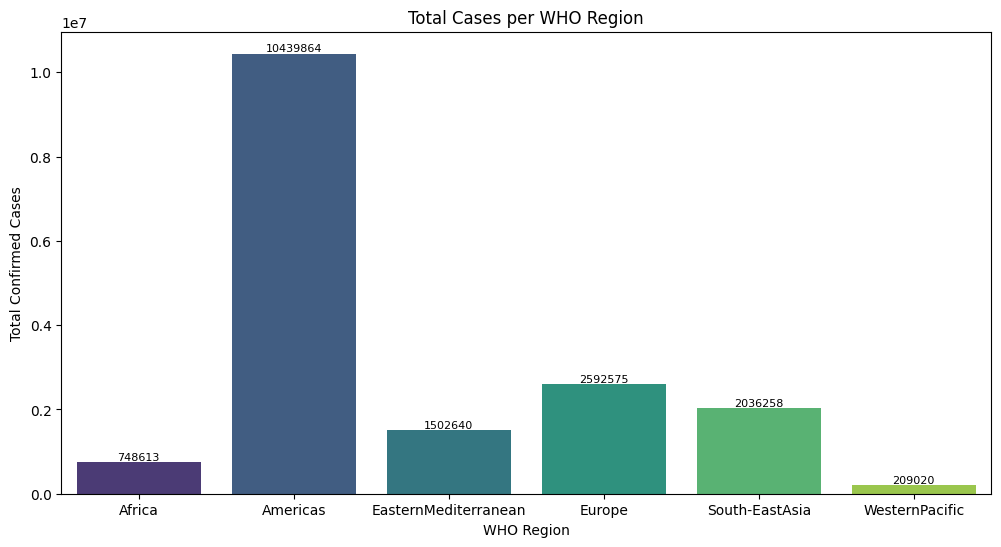

In [11]:
total_confirmed_per_region = df.groupby('WHO Region')['TotalCases'].sum().reset_index()

plt.figure(figsize=(12, 6))
bar_chart_confirmed = sns.barplot(x='WHO Region', y='TotalCases', data=total_confirmed_per_region, palette='viridis')
plt.title('Total Cases per WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Total Confirmed Cases')

for index, value in enumerate(total_confirmed_per_region['TotalCases']):
    plt.text(index, value + 0.1, f'{value}', ha='center', va='bottom', fontsize=8)

plt.show()

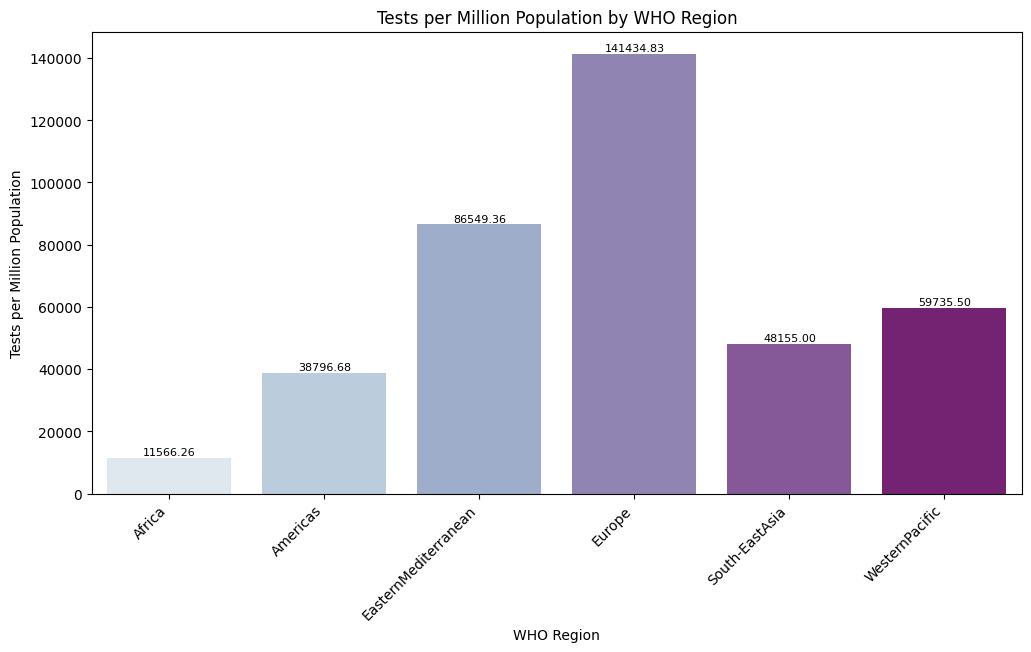

In [23]:
tests_per_million_by_region = df.groupby('WHO Region')['Tests/1M pop'].mean().reset_index()

plt.figure(figsize=(12, 6))
tests_bar = sns.barplot(x='WHO Region', y='Tests/1M pop', data=tests_per_million_by_region, palette='BuPu')
plt.title('Tests per Million Population by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Tests per Million Population')

for index, value in enumerate(tests_per_million_by_region['Tests/1M pop']):
    plt.text(index, value + 50, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=45, ha='right')
plt.show()

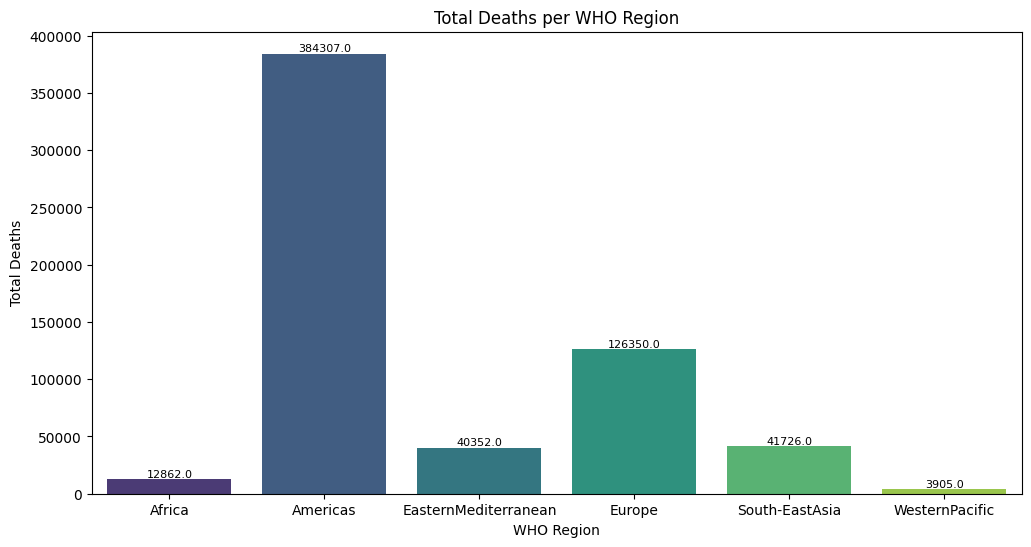

In [12]:
total_deaths_per_region = df.groupby('WHO Region')['TotalDeaths'].sum().reset_index()

plt.figure(figsize=(12, 6))
bar_chart_deaths = sns.barplot(x='WHO Region', y='TotalDeaths', data=total_deaths_per_region, palette='viridis')
plt.title('Total Deaths per WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Total Deaths')

for index, value in enumerate(total_deaths_per_region['TotalDeaths']):
    plt.text(index, value + 0.1, f'{value}', ha='center', va='bottom', fontsize=8)

plt.show()

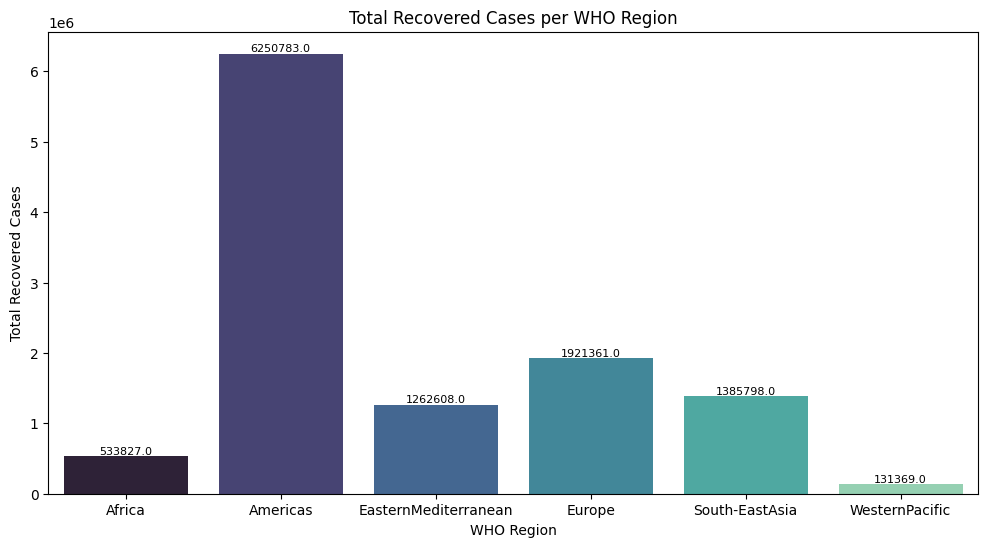

In [13]:
total_recovered_per_region = df.groupby('WHO Region')['TotalRecovered'].sum().reset_index()

plt.figure(figsize=(12, 6))
bar_chart_recovered = sns.barplot(x='WHO Region', y='TotalRecovered', data=total_recovered_per_region, palette='mako')
plt.title('Total Recovered Cases per WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Total Recovered Cases')

for index, value in enumerate(total_recovered_per_region['TotalRecovered']):
    plt.text(index, value + 0.1, f'{value}', ha='center', va='bottom', fontsize=8)

plt.show()


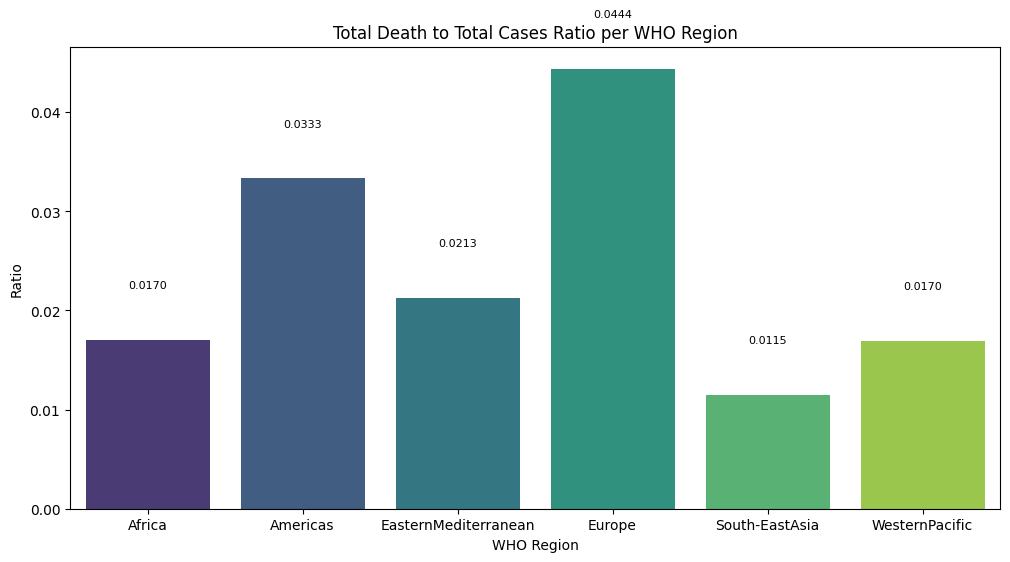

In [14]:
ratio_per_region = df.groupby('WHO Region').apply(lambda x: (x['TotalDeaths'] / x['TotalCases']).mean()).reset_index(name='Total Death to Total Cases Ratio')

plt.figure(figsize=(12, 6))
bar_chart = sns.barplot(x='WHO Region', y='Total Death to Total Cases Ratio', data=ratio_per_region, palette='viridis')
plt.title('Total Death to Total Cases Ratio per WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Ratio')

for index, value in enumerate(ratio_per_region['Total Death to Total Cases Ratio']):
    plt.text(index, value + 0.005, f'{value:.4f}', ha='center', va='bottom', fontsize=8)

plt.show()

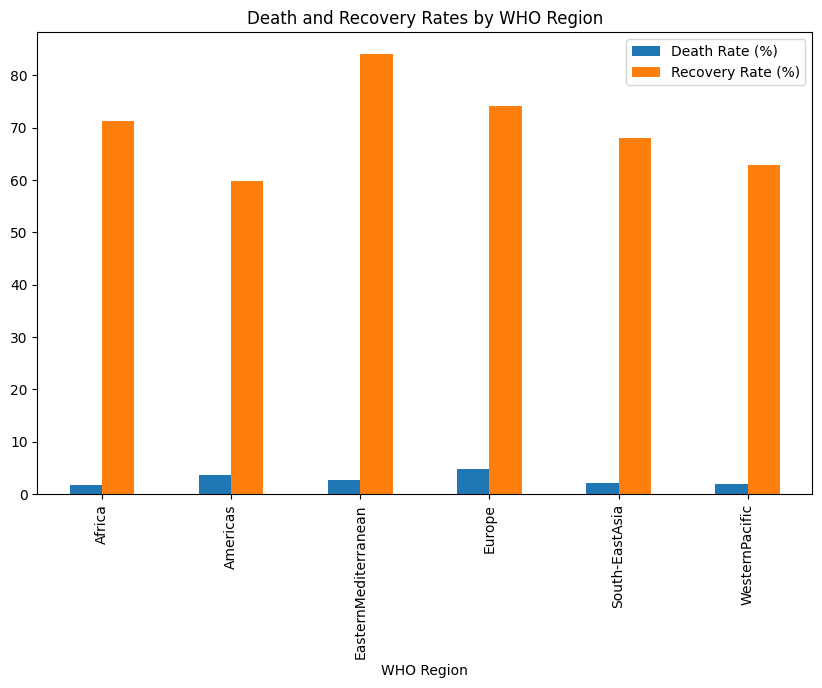

In [15]:
grouped_data = df.groupby('WHO Region')

region_summary = grouped_data.agg({
    'TotalCases': 'sum',
    'TotalDeaths': 'sum',
    'TotalRecovered': 'sum'
}).reset_index()

region_summary['Death Rate (%)'] = (region_summary['TotalDeaths'] / region_summary['TotalCases']) * 100
region_summary['Recovery Rate (%)'] = (region_summary['TotalRecovered'] / region_summary['TotalCases']) * 100

fig, ax = plt.subplots(figsize=(10, 6))
region_summary.plot(kind='bar', x='WHO Region', y=['Death Rate (%)', 'Recovery Rate (%)'], ax=ax)
ax.set_title('Death and Recovery Rates by WHO Region')
plt.show()

In [17]:
countries_with_zero_deaths = df[df['TotalDeaths'] == 0]['Country/Region']

print("Countries with zero deaths:")
print(countries_with_zero_deaths.tolist())


Countries with zero deaths:
[]


In [ ]:
countries_with_zero_confirmed_cases = df[df['Confirmed'] == 0]['Country/Region']

print("Countries with zero confirmed cases:")
print(countries_with_zero_confirmed_cases.tolist())


Countries with zero confirmed cases:
[]


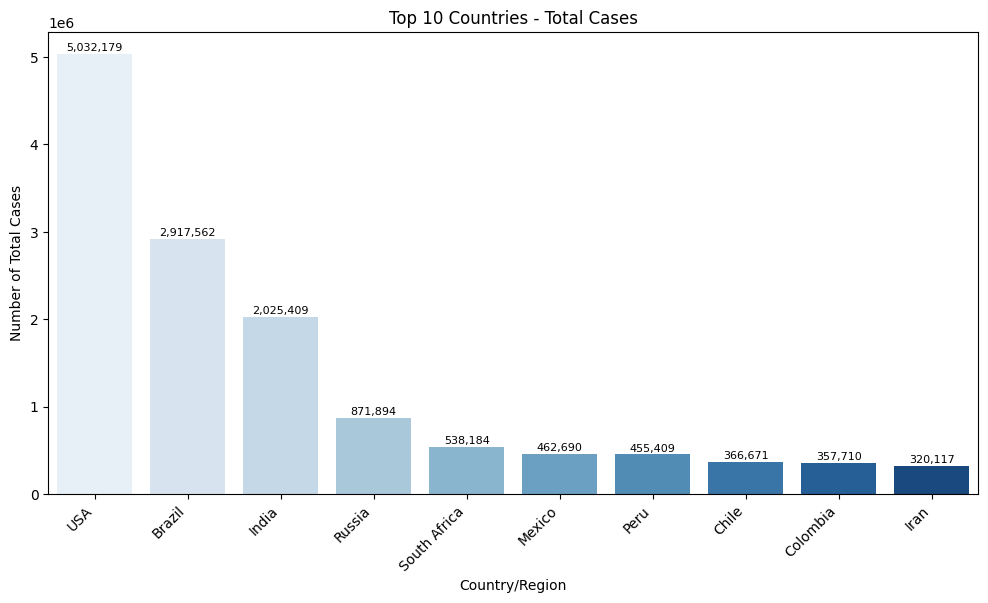

In [19]:
country_summary = df.groupby('Country/Region').agg({
    'TotalCases': 'sum',
    'TotalDeaths': 'sum',
    'TotalRecovered': 'sum',
    'ActiveCases': 'sum'
}).reset_index()

top_10_confirmed = country_summary.sort_values(by='TotalCases', ascending=False).head(10)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
confirmed_bar = sns.barplot(x='Country/Region', y='TotalCases', data=top_10_confirmed, palette='Blues')
plt.title('Top 10 Countries - Total Cases')
plt.xlabel('Country/Region')
plt.ylabel('Number of Total Cases')

for index, value in enumerate(top_10_confirmed['TotalCases']):
    plt.text(index, value + 10000, f'{value:,}', ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=45, ha='right')
plt.show()

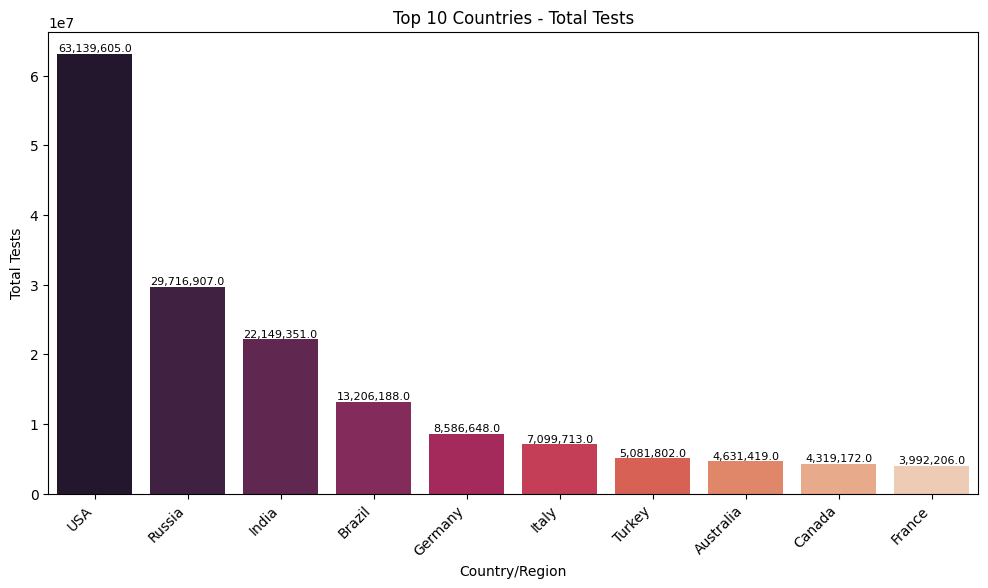

In [28]:
country_summary = df.groupby('Country/Region').agg({
    'Population': 'max',
    'TotalCases': 'sum',
    'TotalDeaths': 'sum',
    'TotalRecovered': 'sum',
    'ActiveCases': 'sum',
    'TotalTests': 'sum'
}).reset_index()

top_10_total_tests = country_summary.sort_values(by='TotalTests', ascending=False).head(10)

plt.figure(figsize=(12, 6))
total_tests_bar = sns.barplot(x='Country/Region', y='TotalTests', data=top_10_total_tests, palette='rocket')
plt.title('Top 10 Countries - Total Tests')
plt.xlabel('Country/Region')
plt.ylabel('Total Tests')

for index, value in enumerate(top_10_total_tests['TotalTests']):
    plt.text(index, value + 50000, f'{value:,}', ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=45, ha='right')
plt.show()

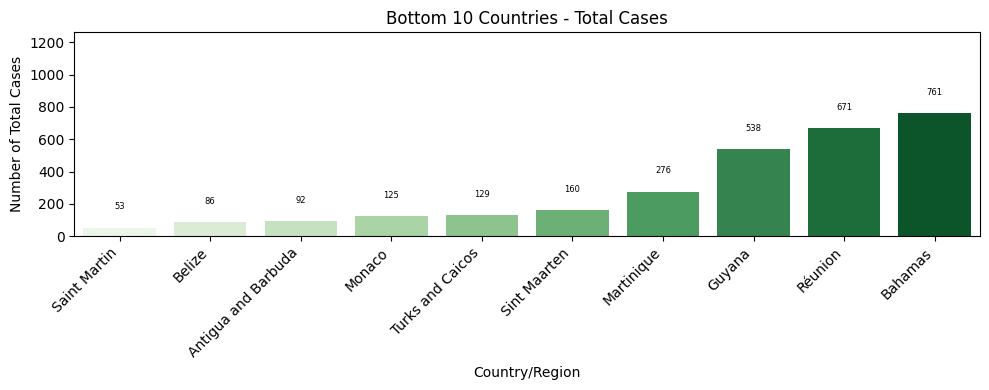

In [20]:
bottom_10_confirmed = country_summary.sort_values(by='TotalCases').head(10)

plt.figure(figsize=(10, 4))
bottom_confirmed_bar = sns.barplot(x='Country/Region', y='TotalCases', data=bottom_10_confirmed, palette='Greens')
plt.title('Bottom 10 Countries - Total Cases')
plt.xlabel('Country/Region')
plt.ylabel('Number of Total Cases')

for index, value in enumerate(bottom_10_confirmed['TotalCases']):
    plt.text(index, value + 100, f'{value:,}', ha='center', va='bottom', fontsize=6)

plt.xticks(rotation=45, ha='right')

plt.ylim(0, max(bottom_10_confirmed['TotalCases']) + 500)

plt.tight_layout()
plt.show()


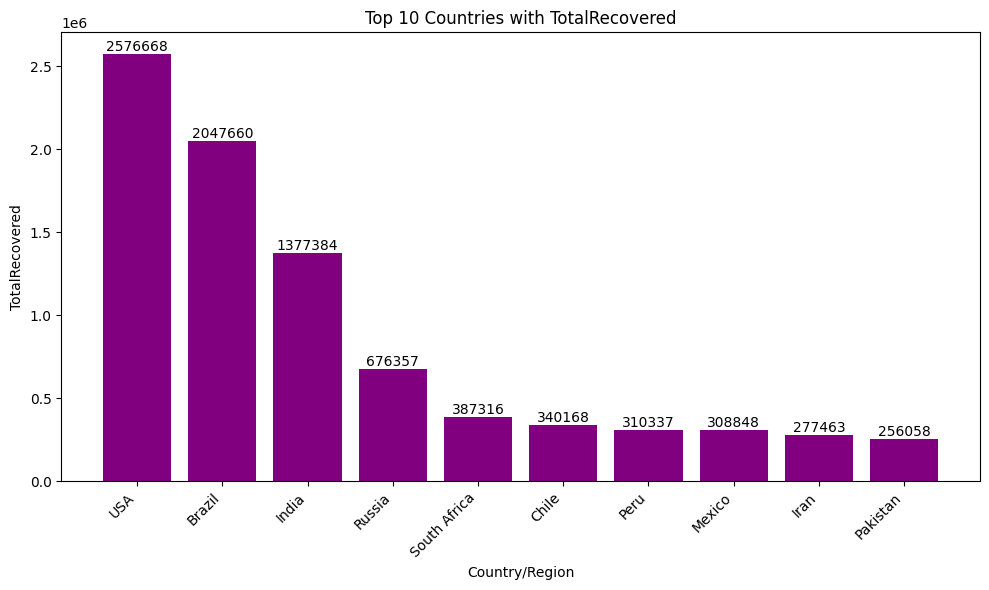

In [45]:
grouped_data = df.groupby('Country/Region')['TotalRecovered'].sum().reset_index()

top_10_countries = grouped_data.nlargest(10, 'TotalRecovered')

plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_countries['Country/Region'], top_10_countries['TotalRecovered'], color='purple')
plt.xlabel('Country/Region')
plt.ylabel('TotalRecovered')
plt.title('Top 10 Countries with TotalRecovered')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

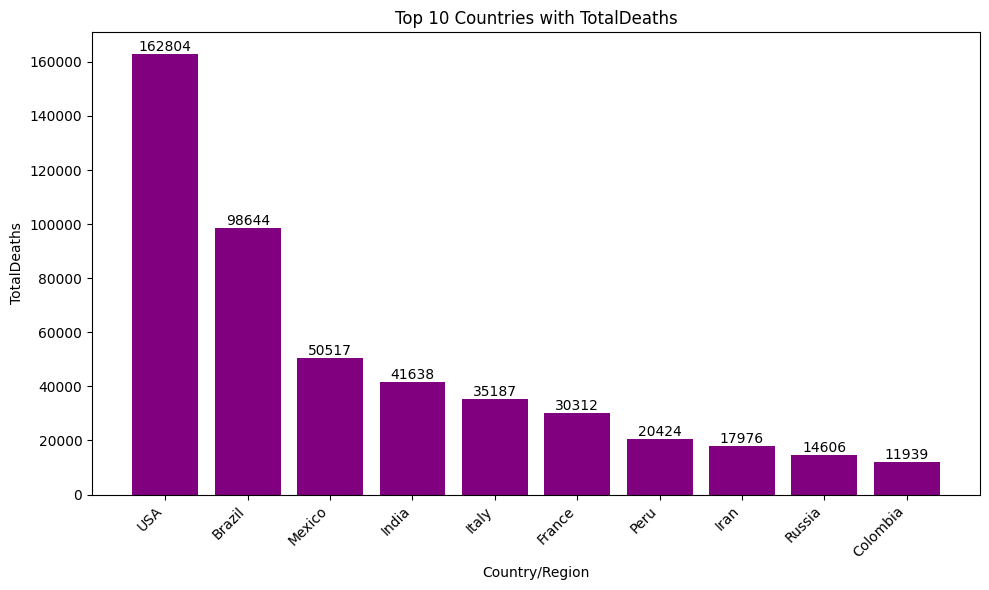

In [46]:
grouped_data = df.groupby('Country/Region')['TotalDeaths'].sum().reset_index()

top_10_countries = grouped_data.nlargest(10, 'TotalDeaths')

plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_countries['Country/Region'], top_10_countries['TotalDeaths'], color='purple')
plt.xlabel('Country/Region')
plt.ylabel('TotalDeaths')
plt.title('Top 10 Countries with TotalDeaths')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

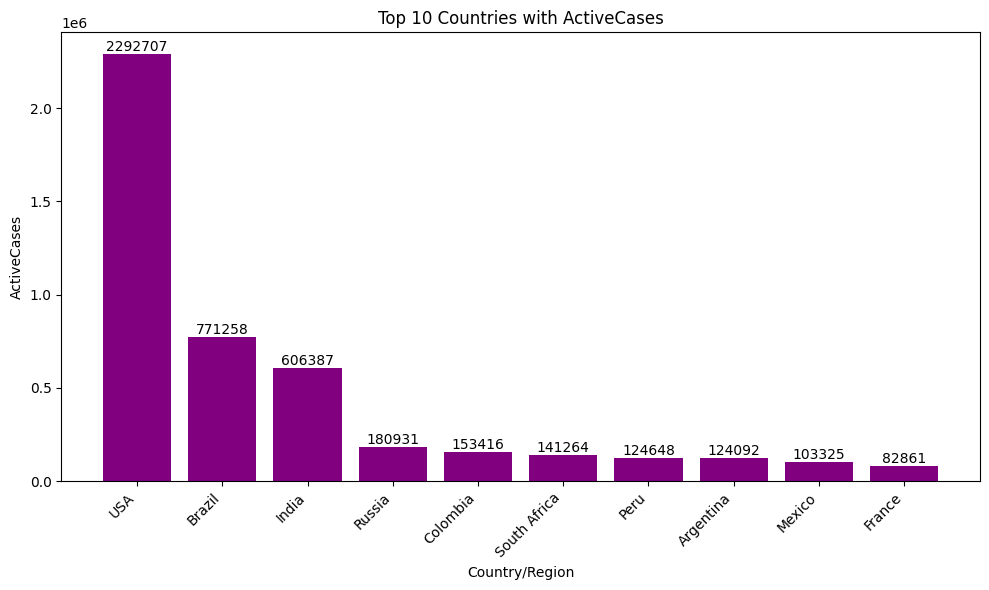

In [47]:
grouped_data = df.groupby('Country/Region')['ActiveCases'].sum().reset_index()

top_10_countries = grouped_data.nlargest(10, 'ActiveCases')

plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_countries['Country/Region'], top_10_countries['ActiveCases'], color='purple')
plt.xlabel('Country/Region')
plt.ylabel('ActiveCases')
plt.title('Top 10 Countries with ActiveCases')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

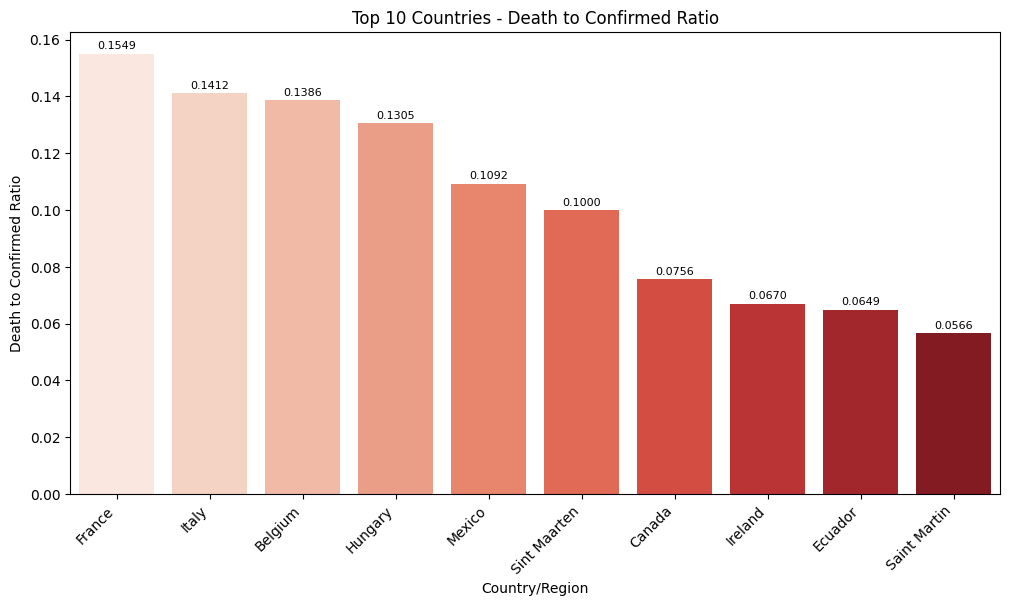

In [40]:
country_summary['Death to Confirmed Ratio'] = country_summary['TotalDeaths'] / country_summary['TotalCases']

top_10_countries = country_summary.sort_values(by='Death to Confirmed Ratio', ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_10_bar = sns.barplot(x='Country/Region', y='Death to Confirmed Ratio', data=top_10_countries, palette='Reds')
plt.title('Top 10 Countries - Death to Confirmed Ratio')
plt.xlabel('Country/Region')
plt.ylabel('Death to Confirmed Ratio')

for index, value in enumerate(top_10_countries['Death to Confirmed Ratio']):
    plt.text(index, value + 0.001, f'{value:.4f}', ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=45, ha='right')
plt.show()


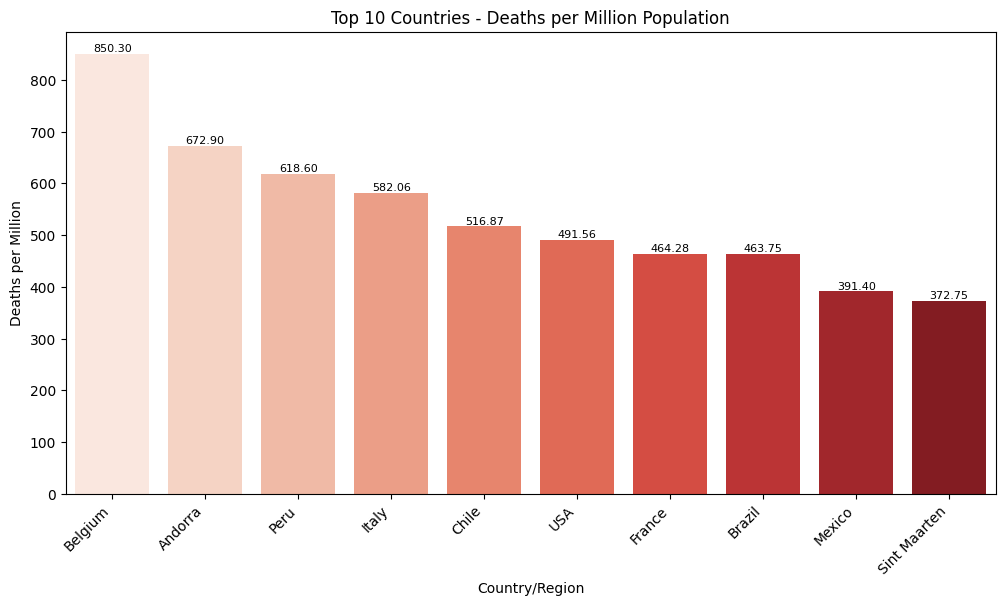

In [48]:
country_summary = df.groupby('Country/Region').agg({
    'TotalDeaths': 'sum',
    'Population': 'max'
}).reset_index()

country_summary['Deaths per Million'] = (country_summary['TotalDeaths'] / country_summary['Population']) * 1_000_000

top_10_countries = country_summary.sort_values(by='Deaths per Million', ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_10_bar = sns.barplot(x='Country/Region', y='Deaths per Million', data=top_10_countries, palette='Reds')
plt.title('Top 10 Countries - Deaths per Million Population')
plt.xlabel('Country/Region')
plt.ylabel('Deaths per Million')

for index, value in enumerate(top_10_countries['Deaths per Million']):
    plt.text(index, value + 0.1, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=45, ha='right')
plt.show()

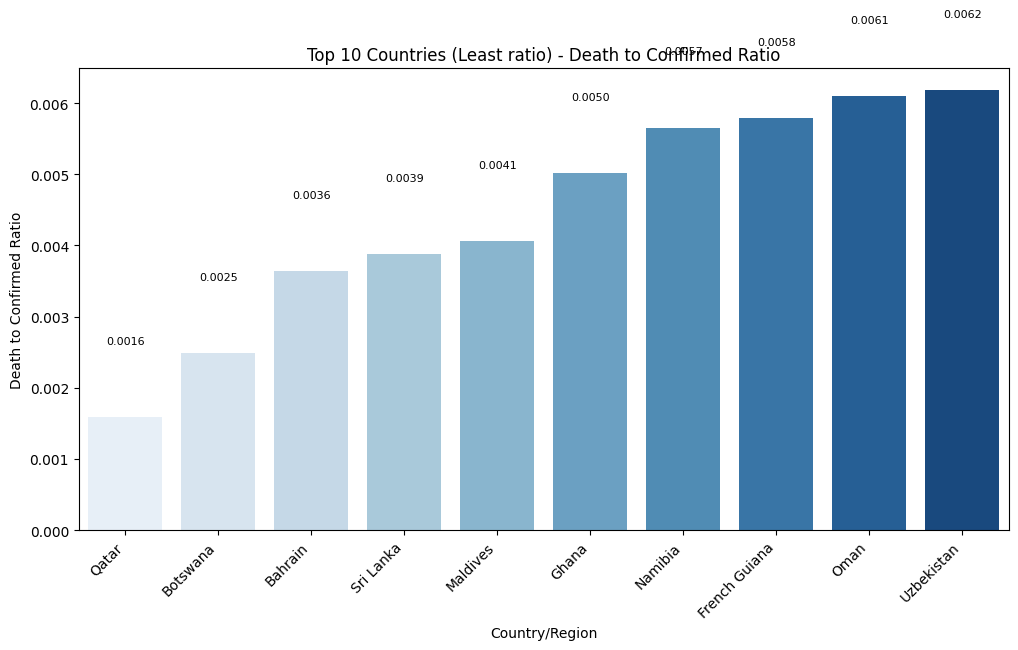

In [30]:
country_summary = df.groupby('Country/Region').agg({
    'Population': 'max',
    'TotalCases': 'sum',
    'TotalDeaths': 'sum',
    'TotalRecovered': 'sum',
    'ActiveCases': 'sum'
}).reset_index()

country_summary['Death to Confirmed Ratio'] = country_summary['TotalDeaths'] / country_summary['TotalCases']

bottom_10_countries = country_summary.sort_values(by='Death to Confirmed Ratio', ascending=True).head(10)

plt.figure(figsize=(12, 6))
bottom_10_bar = sns.barplot(x='Country/Region', y='Death to Confirmed Ratio', data=bottom_10_countries, palette='Blues')
plt.title('Top 10 Countries (Least ratio) - Death to Confirmed Ratio')
plt.xlabel('Country/Region')
plt.ylabel('Death to Confirmed Ratio')

for index, value in enumerate(bottom_10_countries['Death to Confirmed Ratio']):
    plt.text(index, value + 0.001, f'{value:.4f}', ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=45, ha='right')
plt.show()

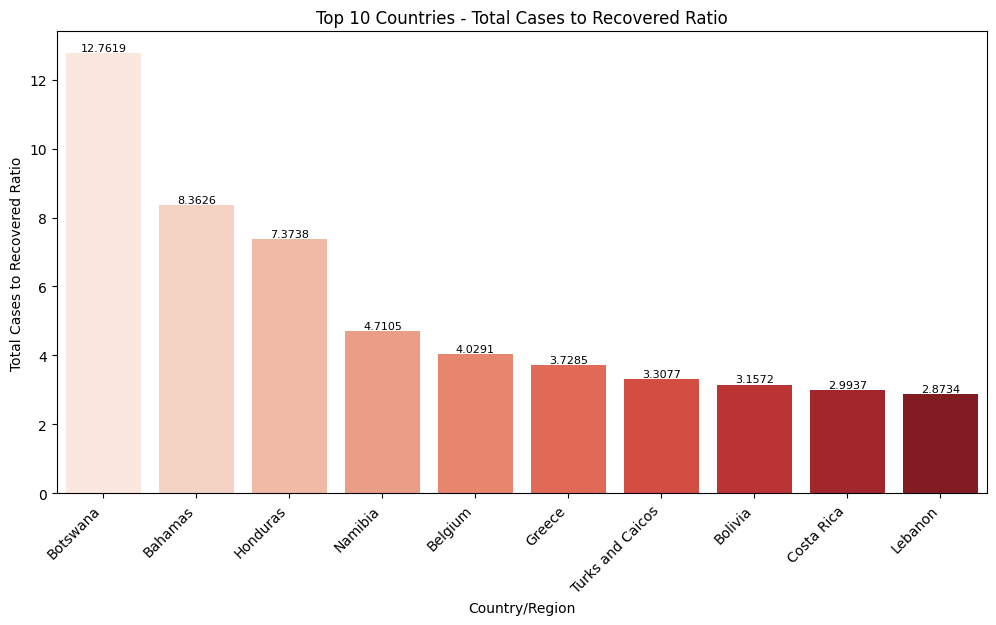

In [42]:
country_summary = df.groupby('Country/Region').agg({
    'TotalCases': 'sum',
    'TotalRecovered': 'sum'
}).reset_index()

country_summary['TotalCases to Recovered Ratio'] = country_summary['TotalCases'] / country_summary['TotalRecovered']

top_10_countries = country_summary.sort_values(by='TotalCases to Recovered Ratio', ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_10_bar = sns.barplot(x='Country/Region', y='TotalCases to Recovered Ratio', data=top_10_countries, palette='Reds')
plt.title('Top 10 Countries - Total Cases to Recovered Ratio')
plt.xlabel('Country/Region')
plt.ylabel('Total Cases to Recovered Ratio')

for index, value in enumerate(top_10_countries['TotalCases to Recovered Ratio']):
    plt.text(index, value + 0.001, f'{value:.4f}', ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=45, ha='right')
plt.show()

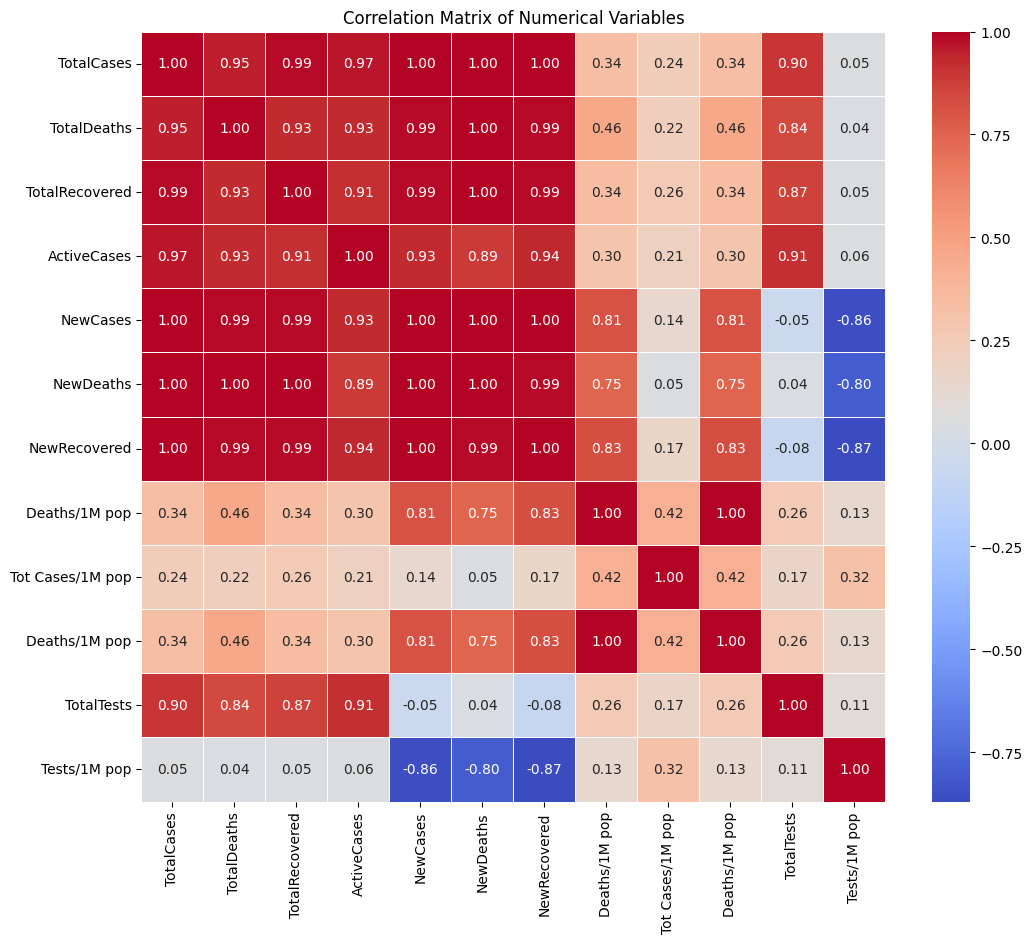

In [34]:
numerical_columns = ['TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases', 'NewCases',
                     'NewDeaths', 'NewRecovered', 'Deaths/1M pop',
                     'Tot Cases/1M pop', 'Deaths/1M pop',
                     'TotalTests', 'Tests/1M pop']

correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [35]:
correlation_threshold = 0.7

high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            variable_pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            high_correlation_pairs.append((variable_pair, correlation_matrix.iloc[i, j]))

if high_correlation_pairs:
    print("Pairs of variables with high correlation:")
    for pair, correlation in high_correlation_pairs:
        print(f"{pair[0]} and {pair[1]}: {correlation:.2f}")
else:
    print("No pairs of variables with high correlation found.")


Pairs of variables with high correlation:
TotalCases and TotalDeaths: 0.95
TotalCases and TotalRecovered: 0.99
TotalCases and ActiveCases: 0.97
TotalCases and NewCases: 1.00
TotalCases and NewDeaths: 1.00
TotalCases and NewRecovered: 1.00
TotalCases and TotalTests: 0.90
TotalDeaths and TotalRecovered: 0.93
TotalDeaths and ActiveCases: 0.93
TotalDeaths and NewCases: 0.99
TotalDeaths and NewDeaths: 1.00
TotalDeaths and NewRecovered: 0.99
TotalDeaths and TotalTests: 0.84
TotalRecovered and ActiveCases: 0.91
TotalRecovered and NewCases: 0.99
TotalRecovered and NewDeaths: 1.00
TotalRecovered and NewRecovered: 0.99
TotalRecovered and TotalTests: 0.87
ActiveCases and NewCases: 0.93
ActiveCases and NewDeaths: 0.89
ActiveCases and NewRecovered: 0.94
ActiveCases and TotalTests: 0.91
NewCases and NewDeaths: 1.00
NewCases and NewRecovered: 1.00
NewCases and Deaths/1M pop: 0.81
NewCases and Deaths/1M pop: 0.81
NewCases and Tests/1M pop: -0.86
NewDeaths and NewRecovered: 0.99
NewDeaths and Deaths/1M